In [1]:
from functions import *
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import shap
from sklearn.model_selection import train_test_split
from collections import Counter

## Data Preprocessing

In [ ]:
path_1 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Processed Data/Merged/THL1_merged.csv"
path_2 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Processed Data/Merged/THL2_merged.csv"
path_3 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Processed Data/Merged/THL3_merged.csv"

THL_1 = pd.read_csv(path_1, sep=',')
THL_2 = pd.read_csv(path_2, sep=',')
THL_3 = pd.read_csv(path_3, sep=',')


In [3]:
## set modules
module1 = ['M01_1_N', 'M02_1_N', 'M03_1_N', 'M04_1_N', 'M05_1_N', 'M06_1_N']

module2 = [
            'M01_2_N', 'M02_2_N', 'M03_2_N', 'M04_2_N', 'M05_2_N', 'M06_2_N',
            'M07_2_N', 'M08_2_N', 'M09_2_N', 'M10_2_N', 'M11_2_N', 'M12_2_N',]

module3 = ['M01_3_N', 'M02_3_N', 'M03_3_N', 'M04_3_N', 'M05_3_N', 'M06_3_N',
            'M07_3_N', 'M08_3_N', 'M09_3_N', 'M10_3_N', 'M11_3_N', 'M12_3_N',
            'M13_3_N', 'M14_3_N', 'M15_3_N', 'M16_3_N', 'M17_3_N']

### Search Space / Param Grid 

In [4]:
'''from hyperopt import *
search_space = {
    'n_estimators': hp.choice('n_estimators', np.arange(5, 50, 5)),  # Smaller number of trees for small datasets
    'max_depth': hp.choice('max_depth', np.arange(3, 20, 1)),  # Limit depth to prevent overfitting
    'max_features': hp.choice('max_features', ['sqrt', 'log2']),  # Control the number of features considered
    'min_samples_split': hp.uniform('min_samples_split', 0.05, 1),  # Increase to avoid splitting on very small samples
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0.05, 1),  # Ensure min_samples_leaf is an integer
    'bootstrap': hp.choice('bootstrap', [True]),  # Set bootstrap to True to avoid overfitting
    'criterion': hp.choice('criterion', ['gini', 'entropy']),  # Criterion for splitting nodes
    'oob_score': hp.choice('oob_score', [True, False]),  # Out-of-bag samples estimation for validation
    'class_weight': 'balanced',
    'ccp_alpha': hp.loguniform('ccp_alpha', -7,0)
}'''

"from hyperopt import *\nsearch_space = {\n    'n_estimators': hp.choice('n_estimators', np.arange(5, 50, 5)),  # Smaller number of trees for small datasets\n    'max_depth': hp.choice('max_depth', np.arange(3, 20, 1)),  # Limit depth to prevent overfitting\n    'max_features': hp.choice('max_features', ['sqrt', 'log2']),  # Control the number of features considered\n    'min_samples_split': hp.uniform('min_samples_split', 0.05, 1),  # Increase to avoid splitting on very small samples\n    'min_samples_leaf': hp.uniform('min_samples_leaf', 0.05, 1),  # Ensure min_samples_leaf is an integer\n    'bootstrap': hp.choice('bootstrap', [True]),  # Set bootstrap to True to avoid overfitting\n    'criterion': hp.choice('criterion', ['gini', 'entropy']),  # Criterion for splitting nodes\n    'oob_score': hp.choice('oob_score', [True, False]),  # Out-of-bag samples estimation for validation\n    'class_weight': 'balanced',\n    'ccp_alpha': hp.loguniform('ccp_alpha', -7,0)\n}"

In [5]:
from hyperopt import *
search_space = {
    'n_estimators': hp.choice('n_estimators', np.arange(5, 20, 2)),  # Smaller number of trees for small datasets
    'max_depth': hp.choice('max_depth', np.arange(4, 10)),  # Limit depth to prevent overfitting
    'max_features': hp.choice('max_features', [None]),  # Control the number of features considered
    'bootstrap': hp.choice('bootstrap', [True]),  # Set bootstrap to True to avoid overfitting
    'criterion': hp.choice('criterion', ['entropy']),  # Criterion for splitting node    
    'min_impurity_decrease': hp.uniform('min_impurity_decrease', 0.001, 0.03),
    'ccp_alpha': hp.uniform('ccp_alpha', 0.05, 0.13),
    'oob_score': hp.choice('oob_score', [True]),  # Out-of-bag samples estimation for validation
    'class_weight': 'balanced',
}


## THL semester 1

In [6]:
# Count occurrences of each unique value in the 'status' column
counter_1 = Counter(THL_1['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_1[1]} | 0: {counter_1[0]}')
hpo = ModelTrainer(random_state=42)
x, y = hpo.split_data(THL_1, module1)

Quantity of Drop Out and Degree in THL-1: 
 1: 502 | 0: 118


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 15.06trial/s, best loss: -0.7687954840805717]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            18               05
	 actual 1            39               62

Model parameters:
{'bootstrap': True, 'ccp_alpha': 0.05791765853496598, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.005412958114539285, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 7, 'n_jobs': None, 'oob_score': True, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Balanced acc.: 69.82350%
Validation accuracy.: 64.51613%
Sensitivity score (for 1): 61.38614%
Specificity score (for 0): 78.26087%
F1 score.: 73.80952%
False prediction: 35.48387%

------------------------

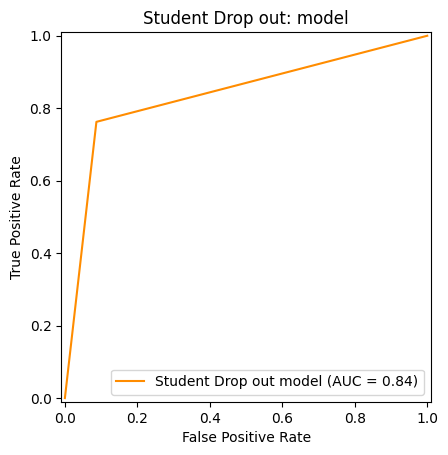

In [7]:
models_1, feature_importance1 = hpo.cross_validation_hpo(
    x=x, y=y,
    search_space=search_space, 
    algo='rf'
    )


In [8]:
feature_importance1

,Feature,Importance
0,M01_1_N,0.295098
1,M02_1_N,0.279724
4,M05_1_N,0.209212
3,M04_1_N,0.126272
2,M03_1_N,0.060333
5,M06_1_N,0.029361


#### Shap analysis

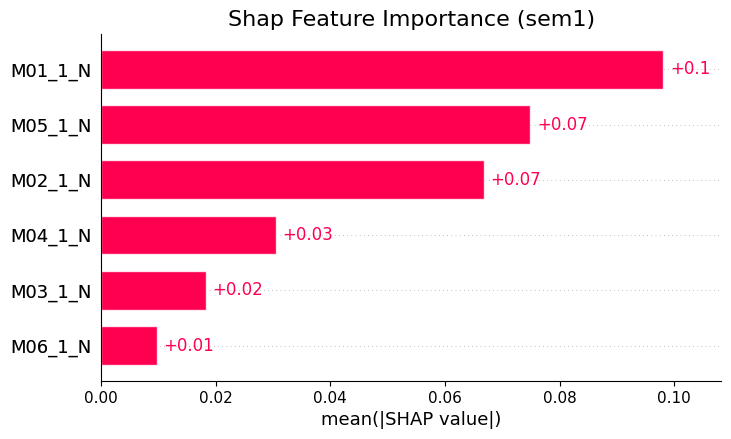

In [9]:
## Shap Global explainations
import shap
explainer = shap.TreeExplainer(models_1['model'], models_1['x_train'])
shap_values = explainer(models_1['x_test'])

plt.title('Shap Feature Importance (sem1)', fontsize=16)
shap.plots.bar(shap_values[...,1])

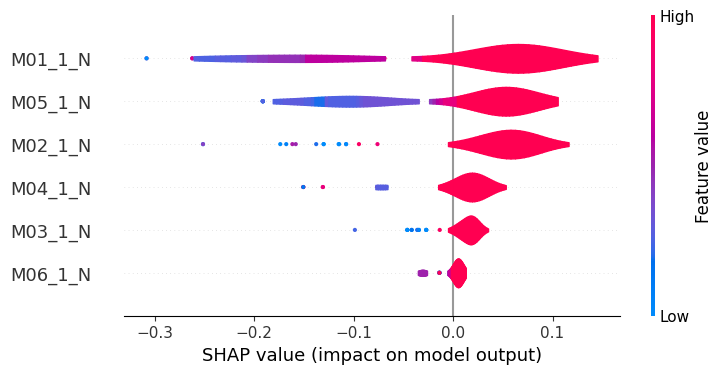

In [10]:
shap.plots.violin(shap_values[...,1], show=True)

In [11]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values[...,1], link='identity')

In [12]:
hpo.plot_shap_force(model=models_1,
           shap_values=shap_values, 
           student_index=12, link='identity', model_name='rf')

Student index 12 grades:
         grades
M01_1_N     5.1
M02_1_N     5.1
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.132, Probability [1]: 0.868


In [13]:
hpo.plot_shap_force(model=models_1, 
           shap_values=shap_values, 
           student_index=14, link='identity', model_name='rf')

Student index 14 grades:
         grades
M01_1_N     5.0
M02_1_N     5.1
M03_1_N     2.0
M04_1_N     5.1
M05_1_N     2.3
M06_1_N     5.0
Status: 1, Prediction: [0], Probability [0]: 0.571, Probability [1]: 0.429


In [14]:
hpo.plot_shap_force(model=models_1, 
           shap_values=shap_values, 
           student_index=4, link='identity', model_name='rf')

Student index 4 grades:
         grades
M01_1_N     3.0
M02_1_N     3.3
M03_1_N     2.7
M04_1_N     5.0
M05_1_N     1.3
M06_1_N     2.0
Status: 0, Prediction: [0], Probability [0]: 0.777, Probability [1]: 0.223


## THL semester 2 

In [29]:
# Count occurrences of each unique value in the 'status' column
counter_2 = Counter(THL_2['status'])
print(f'Quantity of Drop Out and Degree in THL-2: \n 1: {counter_2[1]} | 0: {counter_2[0]}')
hpo2 = ModelTrainer(random_state=72)
x2, y2 = hpo2.split_data(THL_2, module2)

Quantity of Drop Out and Degree in THL-2: 
 1: 315 | 0: 88


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 12.68trial/s, best loss: -0.7889299719887954]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            12               06
	 actual 1            21               42

Model parameters:
{'bootstrap': True, 'ccp_alpha': 0.10905574697833131, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.014707500942109913, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 15, 'n_jobs': None, 'oob_score': True, 'random_state': 72, 'verbose': 0, 'warm_start': False}

Balanced acc.: 66.66667%
Validation accuracy.: 66.66667%
Sensitivity score (for 1): 66.66667%
Specificity score (for 0): 66.66667%
F1 score.: 75.67568%
False prediction: 33.33333%

-----------------------

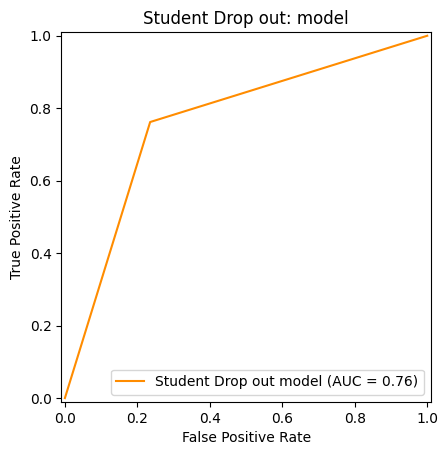

In [30]:
models_2, feature_importance2 = hpo2.cross_validation_hpo(
    x=x2, y=y2,
    search_space=search_space, 
    algo='rf'
    )

In [31]:
feature_importance2

,Feature,Importance
1,M02_2_N,0.324622
0,M01_2_N,0.311931
4,M05_2_N,0.212781
2,M03_2_N,0.084540
9,M10_2_N,0.036910
3,M04_2_N,0.029216
5,M06_2_N,0.000000
6,M07_2_N,0.000000
7,M08_2_N,0.000000
8,M09_2_N,0.000000


#### Shap analysis

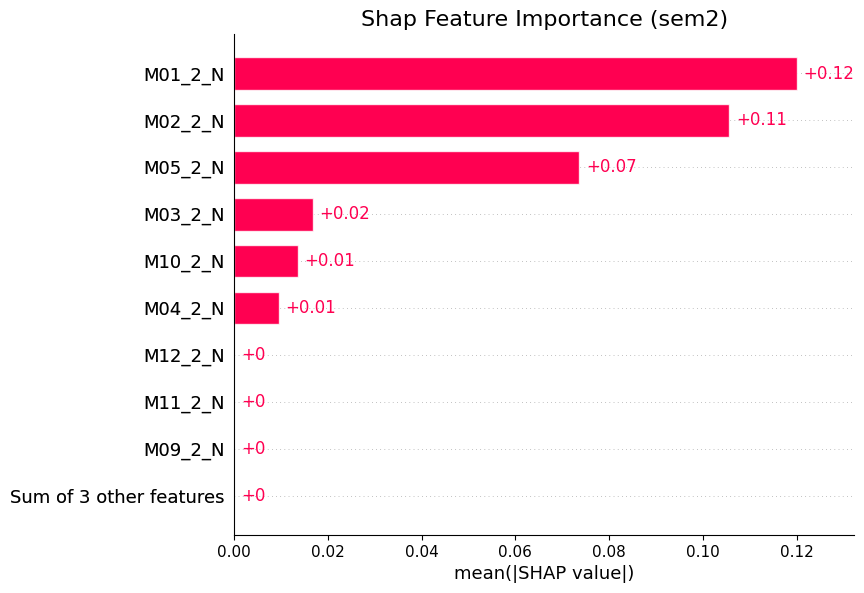

In [32]:
## Shap Global explainations
import shap
explainer2 = shap.TreeExplainer(models_2['model'], models_2['x_train'])
shap_values2 = explainer2(models_2['x_test'])

plt.title('Shap Feature Importance (sem2)', fontsize=16)
shap.plots.bar(shap_values2[...,1])

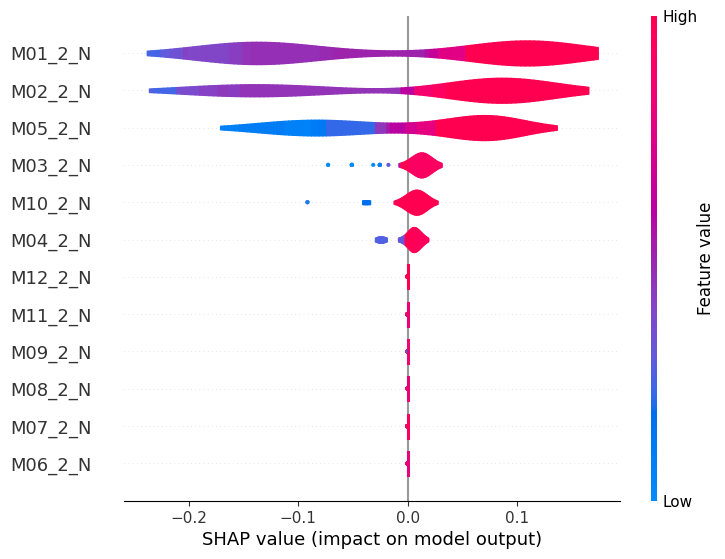

In [33]:
shap.plots.violin(shap_values2[...,1], show=True)

In [34]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values2[...,1], link='identity')

In [35]:
hpo2.plot_shap_force(model=models_2, 
           shap_values=shap_values2, 
           student_index=16, link='identity', model_name='rf')

Student index 16 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.017, Probability [1]: 0.983


In [36]:
hpo2.plot_shap_force(model=models_2, 
           shap_values=shap_values2, 
           student_index=11, link='identity', model_name='rf')

Student index 11 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.017, Probability [1]: 0.983


In [37]:
hpo2.plot_shap_force(model=models_2, 
           shap_values=shap_values2, 
           student_index=12, link='identity', model_name='rf')

Student index 12 grades:
         grades
M01_2_N     3.0
M02_2_N     2.3
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     2.7
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [0], Probability [0]: 0.632, Probability [1]: 0.368


In [38]:
hpo2.plot_shap_force(model=models_2, 
           shap_values=shap_values2, 
           student_index=26, link='identity', model_name='rf')

Student index 26 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.017, Probability [1]: 0.983


## THL semester 3

In [62]:
# Count occurrences of each unique value in the 'status' column
counter_3 = Counter(THL_3['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_3[1]} | 0: {counter_3[0]}')
hpo3 = ModelTrainer(random_state=55)
x3, y3 = hpo3.split_data(THL_3, module3)

Quantity of Drop Out and Degree in THL-1: 
 1: 203 | 0: 85


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 12.64trial/s, best loss: -0.7888954795204797]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            11               06
	 actual 1            09               32

Model parameters:
{'bootstrap': True, 'ccp_alpha': 0.06696377179029167, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.02800367858828013, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 11, 'n_jobs': None, 'oob_score': True, 'random_state': 55, 'verbose': 0, 'warm_start': False}

Balanced acc.: 71.37733%
Validation accuracy.: 74.13793%
Sensitivity score (for 1): 78.04878%
Specificity score (for 0): 64.70588%
F1 score.: 81.01266%
False prediction: 25.86207%

------------------------

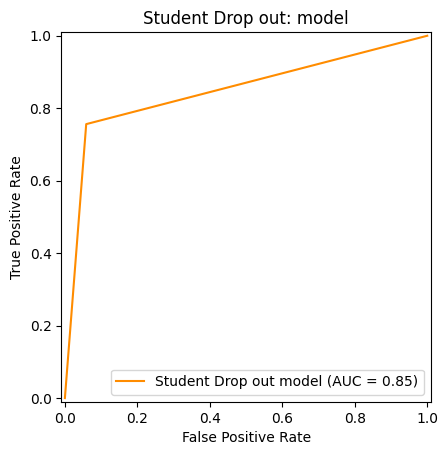

In [63]:
models_3, feature_importance3 = hpo3.cross_validation_hpo(
    x=x3, y=y3,
    search_space=search_space, 
    algo='rf'
    )

In [64]:
feature_importance3

,Feature,Importance
15,M16_3_N,0.439589
10,M11_3_N,0.251600
1,M02_3_N,0.093958
9,M10_3_N,0.093799
5,M06_3_N,0.064519
8,M09_3_N,0.056535
14,M15_3_N,0.000000
13,M14_3_N,0.000000
12,M13_3_N,0.000000
11,M12_3_N,0.000000


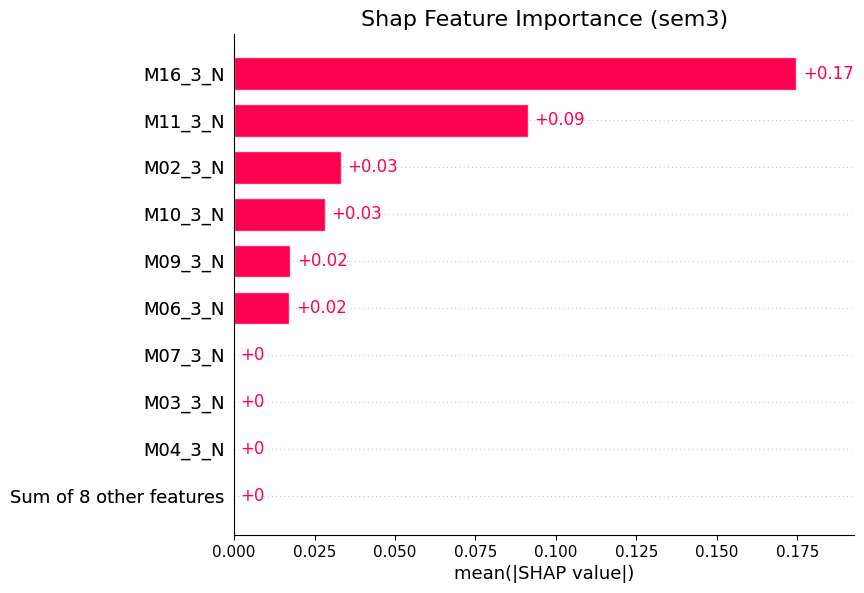

In [65]:
## Shap Global explainations
import shap
explainer3 = shap.TreeExplainer(models_3['model'], models_3['x_train'])
shap_values3 = explainer3(models_3['x_test'])

plt.title('Shap Feature Importance (sem3)', fontsize=16)
shap.plots.bar(shap_values3[..., 1])

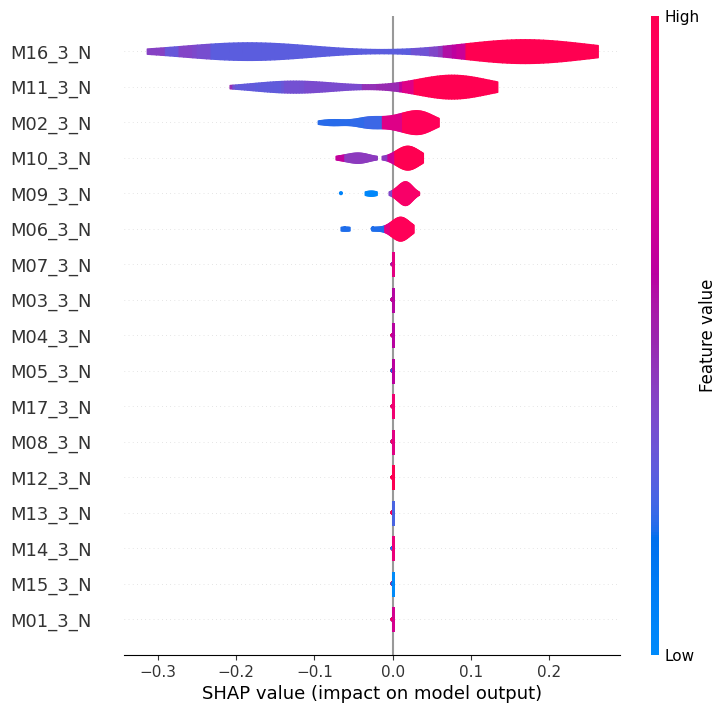

In [66]:
shap.plots.violin(shap_values3[..., 1], show=True)

In [67]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values3[..., 1], link='identity')

In [68]:
hpo3.plot_shap_force(model=models_3, 
           shap_values=shap_values3, 
           student_index=1, link='identity', model_name='rf')

Student index 1 grades:
         grades
M01_3_N     2.7
M02_3_N     2.3
M03_3_N     5.1
M04_3_N     5.1
M05_3_N     5.1
M06_3_N     3.0
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     5.1
M10_3_N     4.0
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 0, Prediction: [1], Probability [0]: 0.390, Probability [1]: 0.610


In [69]:
hpo3.plot_shap_force(model=models_3, 
           shap_values=shap_values3, 
           student_index=4, link='identity', model_name='rf')

Student index 4 grades:
         grades
M01_3_N     3.3
M02_3_N     3.0
M03_3_N     1.0
M04_3_N     3.3
M05_3_N     5.1
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     3.7
M10_3_N     5.1
M11_3_N     3.3
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     1.3
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.438, Probability [1]: 0.562


In [70]:
hpo3.plot_shap_force(model=models_3, 
           shap_values=shap_values3, 
           student_index=5, link='identity', model_name='rf')

Student index 5 grades:
         grades
M01_3_N     5.1
M02_3_N     5.1
M03_3_N     2.7
M04_3_N     5.1
M05_3_N     5.1
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     5.1
M10_3_N     5.1
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.051, Probability [1]: 0.949


In [71]:
hpo3.plot_shap_force(model=models_3, 
           shap_values=shap_values3, 
           student_index=6, link='identity', model_name='rf')

Student index 6 grades:
         grades
M01_3_N     2.3
M02_3_N     1.0
M03_3_N     1.7
M04_3_N     2.0
M05_3_N     1.7
M06_3_N     1.3
M07_3_N     1.0
M08_3_N     1.3
M09_3_N     1.7
M10_3_N     2.3
M11_3_N     4.0
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     1.0
M15_3_N     5.1
M16_3_N     1.3
M17_3_N     1.0
Status: 0, Prediction: [0], Probability [0]: 0.764, Probability [1]: 0.236
